# Задание №4 - IsoMap. Выполнил студент Уваркин Глеб М05-012е группа.

## Зависимости

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn.utils.graph_shortest_path import graph_shortest_path

## Реализация

In [2]:
def createGraph(data, k):
    size = data.shape[0]
    graph = np.zeros((size, size))
    for i in range(size):
        dis = data - np.tile(data[i], (size, 1))
        dis = np.linalg.norm(dis, axis=1)
        order = np.argsort(dis)
        dis = np.sort(dis)
        dist, order = dis[1:k + 1], order[1:k + 1]
        graph[i, i] = 0
        graph[i, order] = dist
        graph[order, i] = dist    
    return graph

In [3]:
def projection(G, q):
    short = graph_shortest_path(G)
    for i in range(G.shape[0]): 
        G[i, :] = short[i]
    DSq = G ** 2
    totalMean = np.mean(DSq)
    columnMean = np.mean(DSq, axis=0)
    rowMean = np.mean(DSq, axis=1)
    matrix = np.zeros(DSq.shape)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            matrix[i][j] = -1/2 * (DSq[i][j] - rowMean[i] - columnMean[j] + totalMean)
    eigVal, eigVec = np.linalg.eig(matrix)
    X = np.dot(eigVec[:, :q], np.sqrt(np.diag(eigVal[:q])))
    return X

In [4]:
def IsoMap(data, K, d):
    G = createGraph(data, K)
    size = data.shape[0]
    short = graph_shortest_path(G)
    for i in range(size):
        G[i] = short[i]
    Y = projection(G, d)
    return Y

## Mnist dataset

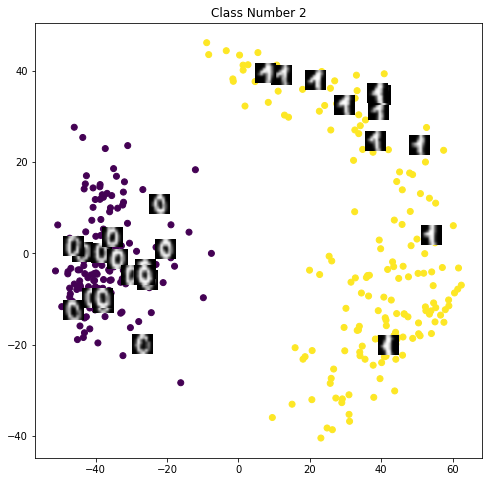

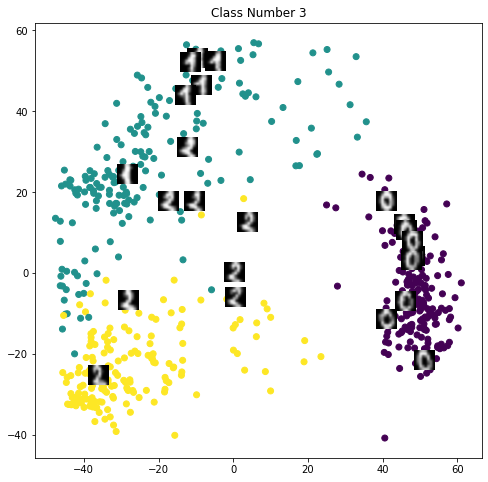

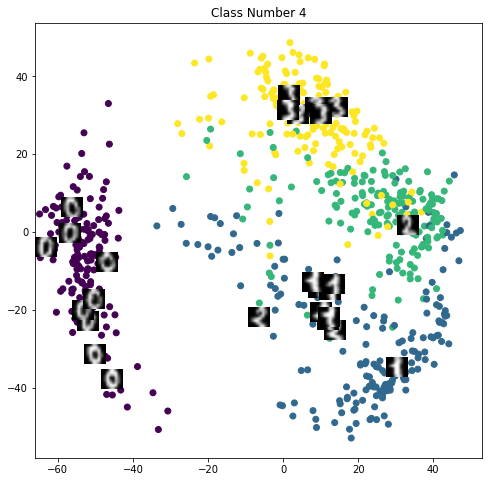

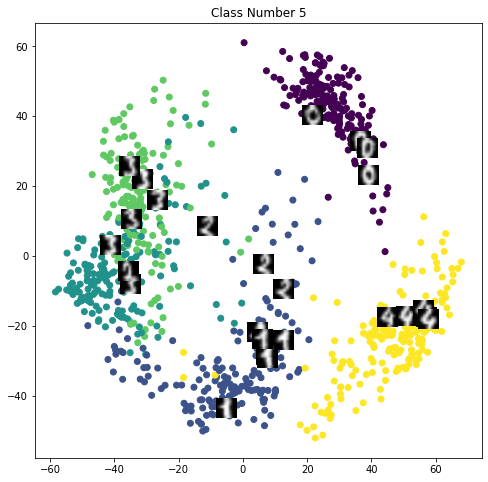

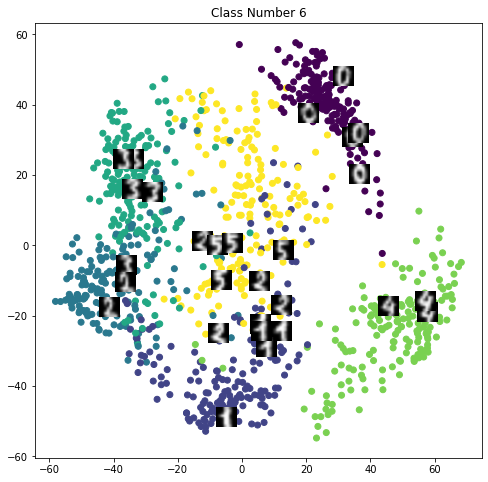

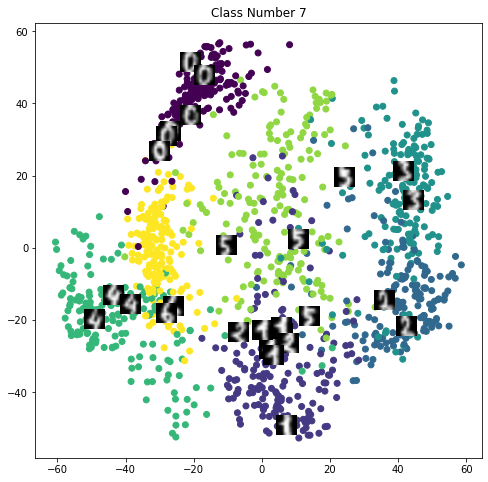

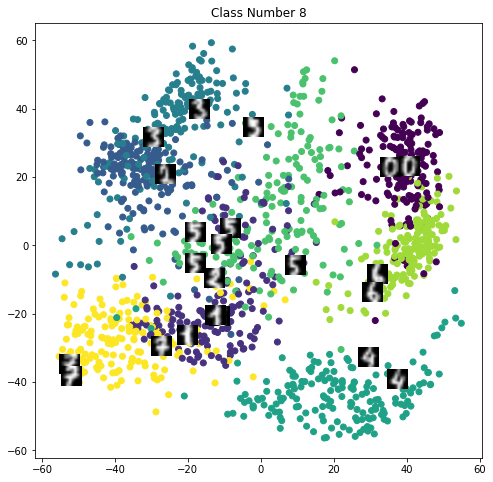

In [5]:
datasets = [ds.load_digits(n_class=i) for i in range(2,9)]
d = 2
K = 100
for j, data in enumerate(datasets):
    Y = IsoMap(data.data, K, d)
    x_size = (max(Y[:, 0]) - min(Y[:, 0])) * 0.05
    y_size = (max(Y[:, 1]) - min(Y[:, 1])) * 0.05

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    for i in range(40):
      img_num = np.random.randint(0, 40)
      x0 = Y[img_num, 0] - (x_size / 2.)
      y0 = Y[img_num, 1] - (y_size / 2.)
      x1 = Y[img_num, 0] + (x_size / 2.)
      y1 = Y[img_num, 1] + (y_size / 2.)
      img = data.data[img_num, :].reshape(8, 8)
      ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='gaussian', zorder=100, extent=(x0, x1, y0, y1))
        
    ax.set_title(f"Class Number {j+2}")
    ax.scatter(Y[:,0], Y[:,1], c=data.target)
    plt.show()